In [170]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

In [196]:
m      = 2
x      = np.arange(-5, 5)
y      = np.array([5*n + np.random.normal(0,1) for n in x])
guess  = m * x
losses = (y - (m*x)) ** 2
slopes = (y - (m*x)) * (-2*x)

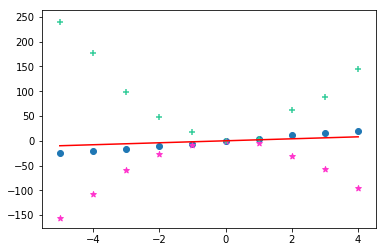

In [197]:
plt.scatter(x,y);
plt.plot(x,guess,c='red');
plt.scatter(x, slopes, c='#ff33cc', marker='*');
plt.scatter(x, losses, c='#33cc99', marker='+');

In [198]:
for i in range(3, 7):
    s = (y - (i*x)) * (-2*x)
    print('coefficient:', i, 'total slope:', sum(s))

coefficient: 3 total slope: -374.8027187802737
coefficient: 4 total slope: -204.8027187802737
coefficient: 5 total slope: -34.802718780273686
coefficient: 6 total slope: 135.1972812197263


In [257]:
def plotter(x, y, m_range):
    mses   = [((y - (m*x)) ** 2).mean()     for m in m_range]
    slopes = [((y - (m*x)) * (-2*x)).mean() for m in m_range]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax[0].scatter(m_range, mses)
    ax[0].plot(m_range, slopes, c='#ff33cc', marker='+')
    ax[0].set_xlabel('m')
    ax[0].set_ylabel('mse')
    ax[0].set_title('mse as a function of slope')

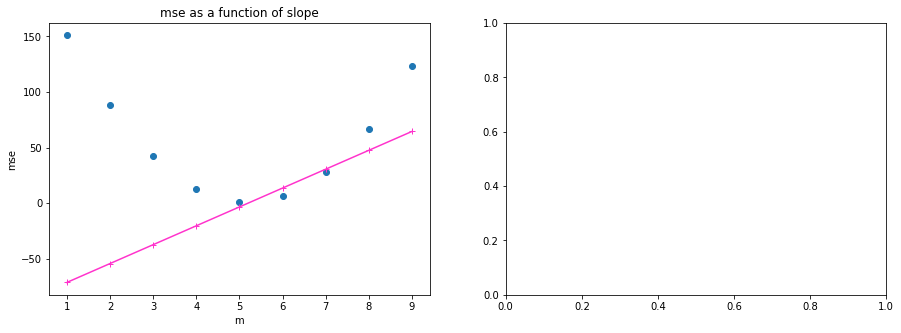

In [258]:
plotter(x, y, range(1, 10))